<a href="https://colab.research.google.com/github/azolekar/CommodityPricePredictor/blob/main/EDA_Avdhut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Global Commodity Price Analysis and Prediction

## 1. Problem Statement:
 In today's global economy, the prices of essential commodities vary significantly across regions and market types (Retail, Wholesale, Producer, Farm Gate). These fluctuations can pose challenges for consumers, businesses, and traders who need to make informed purchasing or selling decisions. Additionally, the dynamic nature of local and global economies makes it difficult to predict future price changes, which impacts supply chain management, consumer budgets, and overall market stability. This project aims to analyze how regional and market type variations influence commodity price trends and to develop a model that predicts future prices based on historical data.

## 2. Data:
Data Set and Documentation Link: https://www.kaggle.com/datasets/jboysen/global-food-prices/data

## Evaluation:

## Features:
* We are dealing with structured data.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# # Unzip the uploaded data into d - destination
# !unzip "/content/drive/MyDrive/archive" -d "/content/drive/MyDrive/Data_Science"

Archive:  /content/drive/MyDrive/archive.zip
replace /content/drive/MyDrive/Data_Science/wfp_market_food_prices.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd
file_path = "/content/drive/MyDrive/Data_Science/wfp_market_food_prices.csv"
food_prices_df = pd.read_csv(file_path, encoding='latin-1')
food_prices_df.describe()

adm0_id        adm1_id         mkt_id          cm_id  \
count  743914.000000  743914.000000  743914.000000  743914.000000   
mean      929.754832   17779.426232     885.962341     161.130914   
std      6595.353806   81345.242217     540.492854     117.826297   
min         1.000000       0.000000      80.000000      50.000000   
25%       115.000000    1510.000000     377.000000      67.000000   
50%       170.000000    2207.000000     912.000000     110.000000   
75%       205.000000   21969.000000    1134.000000     233.000000   
max     70001.000000  900022.000000    2094.000000     490.000000   

              cur_id          pt_id          um_id       mp_month  \
count  743914.000000  743914.000000  743914.000000  743914.000000   
mean       57.325319      14.930508      10.562171       6.379772   
std        23.140366       0.277872      13.160485       3.434972   
min        22.000000      14.000000       5.000000       1.000000   
25%        30.000000      15.000000       5.000000       3.000000   
50%        63.000000      15.000000       5.000000       6.000000   
75%        77.000000      15.000000       5.000000       9.000000   
max        95.000000      18.000000     100.000000      12.000000   

             mp_year      mp_price  
count  743914.000000  7.439140e+05  
mean     2012.516549  4.196333e+03  
std         3.669519  5.549296e+04  
min      1992.000000  0.000000e+00  
25%      2011.000000  3.000000e+01  
50%      2013.000000  1.750000e+02  
75%      2015.000000  5.000000e+02  
max      2017.000000  5.833333e+06

In [ ]:
print("Original column names:")
print(food_prices_df.columns)

Original column names:
Index(['adm0_id', 'adm0_name', 'adm1_id', 'adm1_name', 'mkt_id', 'mkt_name',
       'cm_id', 'cm_name', 'cur_id', 'cur_name', 'pt_id', 'pt_name', 'um_id',
       'um_name', 'mp_month', 'mp_year', 'mp_price', 'mp_commoditysource'],
      dtype='object')


In [ ]:
column_rename_dict = {
    'adm0_id': 'country_id',
    'adm0_name': 'country_name',
    'adm1_id': 'region_id',
    'adm1_name': 'region_name',
    'mkt_id': 'market_id',
    'mkt_name': 'market_name',
    'cm_id': 'commodity_id',
    'cm_name': 'commodity_name',
    'cur_id': 'currency_id',
    'cur_name': 'currency_name',
    'pt_id': 'price_type_id',
    'pt_name': 'price_type_name',
    'um_id': 'unit_id',
    'um_name': 'unit_name',
    'mp_month': 'month',
    'mp_year': 'year',
    'mp_price': 'price',
    'mp_commoditysource': 'commodity_source'
}

food_prices_df = food_prices_df.rename(columns=column_rename_dict)

food_prices_df.head()

country_id country_name  region_id region_name  market_id market_name  \
0           1  Afghanistan        272  Badakhshan        266    Fayzabad   
1           1  Afghanistan        272  Badakhshan        266    Fayzabad   
2           1  Afghanistan        272  Badakhshan        266    Fayzabad   
3           1  Afghanistan        272  Badakhshan        266    Fayzabad   
4           1  Afghanistan        272  Badakhshan        266    Fayzabad   

   commodity_id commodity_name  currency_id currency_name  price_type_id  \
0            55          Bread           87           AFN             15   
1            55          Bread           87           AFN             15   
2            55          Bread           87           AFN             15   
3            55          Bread           87           AFN             15   
4            55          Bread           87           AFN             15   

  price_type_name  unit_id unit_name  month  year  price commodity_source  
0          Retail        5        KG      1  2014   50.0              WFP  
1          Retail        5        KG      2  2014   50.0              WFP  
2          Retail        5        KG      3  2014   50.0              WFP  
3          Retail        5        KG      4  2014   50.0              WFP  
4          Retail        5        KG      5  2014   50.0              WFP

In [ ]:
# List of countries to filter
countries = [
    'Cambodia',
    'Indonesia',
    'Lao People\'s Democratic Republic',
    'Myanmar',
    'Philippines',
    'Timor-Leste'
]

filtered_df = food_prices_df[food_prices_df['country_name'].isin(countries)]

print(filtered_df.head())


       country_id country_name  region_id      region_name  market_id  \
36305          44     Cambodia        794  Kampong Chhnang        632   
36306          44     Cambodia        794  Kampong Chhnang        632   
36307          44     Cambodia        794  Kampong Chhnang        632   
36308          44     Cambodia        794  Kampong Chhnang        632   
36309          44     Cambodia        794  Kampong Chhnang        632   

           market_name  commodity_id   commodity_name  currency_id  \
36305  Kampong Chhnang            96  Oil (vegetable)           60   
36306  Kampong Chhnang            96  Oil (vegetable)           60   
36307  Kampong Chhnang            96  Oil (vegetable)           60   
36308  Kampong Chhnang            96  Oil (vegetable)           60   
36309  Kampong Chhnang            96  Oil (vegetable)           60   

      currency_name  price_type_id price_type_name  unit_id unit_name  month  \
36305           KHR             15          Retail        5 

In [ ]:
print("Dataset info: ")
filtered_df.info()

print("\nStatistics of the dataset: ")
filtered_df.describe()

print(f'The dataset is of size : {filtered_df.shape}')

Dataset info: 
<class 'pandas.core.frame.DataFrame'>
Index: 54822 entries, 36305 to 651701
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country_id        54822 non-null  int64  
 1   country_name      54822 non-null  object 
 2   region_id         54822 non-null  int64  
 3   region_name       53479 non-null  object 
 4   market_id         54822 non-null  int64  
 5   market_name       54822 non-null  object 
 6   commodity_id      54822 non-null  int64  
 7   commodity_name    54822 non-null  object 
 8   currency_id       54822 non-null  int64  
 9   currency_name     54822 non-null  object 
 10  price_type_id     54822 non-null  int64  
 11  price_type_name   54822 non-null  object 
 12  unit_id           54822 non-null  int64  
 13  unit_name         54822 non-null  object 
 14  month             54822 non-null  int64  
 15  year              54822 non-null  int64  
 16  price             54822 n

(54822, 18)

In [ ]:
filtered_df_dropped = filtered_df.dropna(subset=['region_name'])
filtered_df_dropped['country_name'].unique() #Indonesia got dropped

array(['Cambodia', "Lao People's Democratic Republic", 'Myanmar',
       'Philippines', 'Timor-Leste'], dtype=object)

In [ ]:
# Just wanted to take a look at units
print(filtered_df['unit_name'].value_counts())

unit_name
KG        44543
L          6254
Day        2067
Unit       1733
385 G       126
750 G        33
1.5 L        33
10 pcs       33
Name: count, dtype: int64


In [ ]:
# Want to check the items with Day as an unit
filtered_df[filtered_df['unit_name'] == 'Day']

# Not sure if Wage counts as a comodity but rolling w it

country_id country_name  region_id      region_name  market_id  \
36529           44     Cambodia        794  Kampong Chhnang        632   
36530           44     Cambodia        794  Kampong Chhnang        632   
36531           44     Cambodia        794  Kampong Chhnang        632   
36532           44     Cambodia        794  Kampong Chhnang        632   
36533           44     Cambodia        794  Kampong Chhnang        632   
...            ...          ...        ...              ...        ...   
391116         171      Myanmar      41775         Shan (N)       1670   
391117         171      Myanmar      41775         Shan (N)       1670   
391118         171      Myanmar      41775         Shan (N)       1670   
391119         171      Myanmar      41775         Shan (N)       1670   
391120         171      Myanmar      41775         Shan (N)       1670   

            market_name  commodity_id  \
36529   Kampong Chhnang           277   
36530   Kampong Chhnang           277   
36531   Kampong Chhnang           277   
36532   Kampong Chhnang           277   
36533   Kampong Chhnang           277   
...                 ...           ...   
391116          Ban Wai           465   
391117          Ban Wai           465   
391118          Ban Wai           465   
391119          Ban Wai           465   
391120          Ban Wai           465   

                                       commodity_name  currency_id  \
36529                     Wage (non-qualified labour)           60   
36530                     Wage (non-qualified labour)           60   
36531                     Wage (non-qualified labour)           60   
36532                     Wage (non-qualified labour)           60   
36533                     Wage (non-qualified labour)           60   
...                                               ...          ...   
391116  Wage (non-qualified labour, non-agricultural)           74   
391117  Wage (non-qualified labour, non-agricultural)           74   
391118  Wage (non-qualified labour, non-agricultural)           74   
391119  Wage (non-qualified labour, non-agricultural)           74   
391120  Wage (non-qualified labour, non-agricultural)           74   

       currency_name  price_type_id price_type_name  unit_id unit_name  month  \
36529            KHR             15          Retail       51       Day      4   
36530            KHR             15          Retail       51       Day      5   
36531            KHR             15          Retail       51       Day      6   
36532            KHR             15          Retail       51       Day      7   
36533            KHR             15          Retail       51       Day      8   
...              ...            ...             ...      ...       ...    ...   
391116           MMK             15          Retail       51       Day      1   
391117           MMK             15          Retail       51       Day      2   
391118           MMK             15          Retail       51       Day      3   
391119           MMK             15          Retail       51       Day      4   
391120           MMK             15          Retail       51       Day      5   

        year    price commodity_source  
36529   2013  14000.0     WFP Cambodia  
36530   2013  15000.0     WFP Cambodia  
36531   2013  15000.0     WFP Cambodia  
36532   2013  15000.0     WFP Cambodia  
36533   2013  15500.0     WFP Cambodia  
...      ...      ...              ...  
391116  2017  15200.0              WFP  
391117  2017  15440.0              WFP  
391118  2017   5360.0              WFP  
391119  2017  15440.0              WFP  
391120  2017  15680.0              WFP  

[2067 rows x 18 columns]

In [ ]:
print(filtered_df['currency_name'].unique())

['KHR' 'IDR' 'LAK' 'MMK' 'PHP' 'USD']


In [ ]:
# Let's convert anything to USD then we can plot maybe?
# Exchange rates as of Sept-26
exchange_rates = {
    'KHR': 0.00025,
    'IDR': 0.000066,
    'LAK': 0.000045,
    'MMK': 0.000477,
    'PHP': 0.018,
    'USD': 1.0,
}
# Convert the exchange_rates dictionary to a pandas Series
exchange_rates_series = pd.Series(exchange_rates)
print(exchange_rates_series)
# Create a new column with the exchange rates
filtered_df['exchange_rate'] = filtered_df['currency_name'].map(exchange_rates_series)
filtered_df['exchange_rate'].head()

KHR    0.000250
IDR    0.000066
LAK    0.000045
MMK    0.000477
PHP    0.018000
USD    1.000000
dtype: float64


<ipython-input-11-2c5b3f4a44c0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['exchange_rate'] = filtered_df['currency_name'].map(exchange_rates_series)


36305    0.00025
36306    0.00025
36307    0.00025
36308    0.00025
36309    0.00025
Name: exchange_rate, dtype: float64

In [ ]:
# Create a new column with the prices in USD
filtered_df['price_usd'] = filtered_df['price'] * filtered_df['exchange_rate']
filtered_df.head()

<ipython-input-12-9e1436d3d1e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['price_usd'] = filtered_df['price'] * filtered_df['exchange_rate']


country_id country_name  region_id      region_name  market_id  \
36305          44     Cambodia        794  Kampong Chhnang        632   
36306          44     Cambodia        794  Kampong Chhnang        632   
36307          44     Cambodia        794  Kampong Chhnang        632   
36308          44     Cambodia        794  Kampong Chhnang        632   
36309          44     Cambodia        794  Kampong Chhnang        632   

           market_name  commodity_id   commodity_name  currency_id  \
36305  Kampong Chhnang            96  Oil (vegetable)           60   
36306  Kampong Chhnang            96  Oil (vegetable)           60   
36307  Kampong Chhnang            96  Oil (vegetable)           60   
36308  Kampong Chhnang            96  Oil (vegetable)           60   
36309  Kampong Chhnang            96  Oil (vegetable)           60   

      currency_name  price_type_id price_type_name  unit_id unit_name  month  \
36305           KHR             15          Retail        5        KG     12   
36306           KHR             15          Retail        5        KG      1   
36307           KHR             15          Retail        5        KG      2   
36308           KHR             15          Retail        5        KG      3   
36309           KHR             15          Retail        5        KG      4   

       year      price commodity_source  exchange_rate  price_usd  
36305  2014  5000.0000     WFP Cambodia        0.00025   1.250000  
36306  2015  4600.0000     WFP Cambodia        0.00025   1.150000  
36307  2015  4600.0000     WFP Cambodia        0.00025   1.150000  
36308  2015  4600.0000     WFP Cambodia        0.00025   1.150000  
36309  2015  4266.6667     WFP Cambodia        0.00025   1.066667

In [ ]:
# Round till second decimal
filtered_df['price_usd'] = filtered_df['price_usd'].round(2)

<ipython-input-14-82cd308fa9c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['price_usd'] = filtered_df['price_usd'].round(2)


In [ ]:
filtered_df['country_name'].value_counts()


country_name
Philippines                         18115
Lao People's Democratic Republic    15436
Myanmar                             14601
Cambodia                             3960
Timor-Leste                          1367
Indonesia                            1343
Name: count, dtype: int64

In [ ]:
# Value counts for comodity
filtered_df['commodity_name'].value_counts()

commodity_name
Rice (low quality)           3200
Salt                         2368
Rice (mixed, low quality)    2206
Oil (palm)                   2109
Eggs                         1858
                             ... 
Cassava                       105
Maize flour (imported)         33
Oil (vegetable, imported)      33
Eggs (imported)                33
Meat (chicken, imported)       33
Name: count, Length: 72, dtype: int64

In [ ]:
# Let's check value counts for year
filtered_df['year'].value_counts()

year
2015    10157
2014     8805
2016     8369
2012     4848
2013     4178
2009     4148
2017     3840
2010     3581
2011     3201
2008     2923
2007      238
2003      131
2004      127
2005      116
2006      101
2001       21
2000       19
2002       19
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

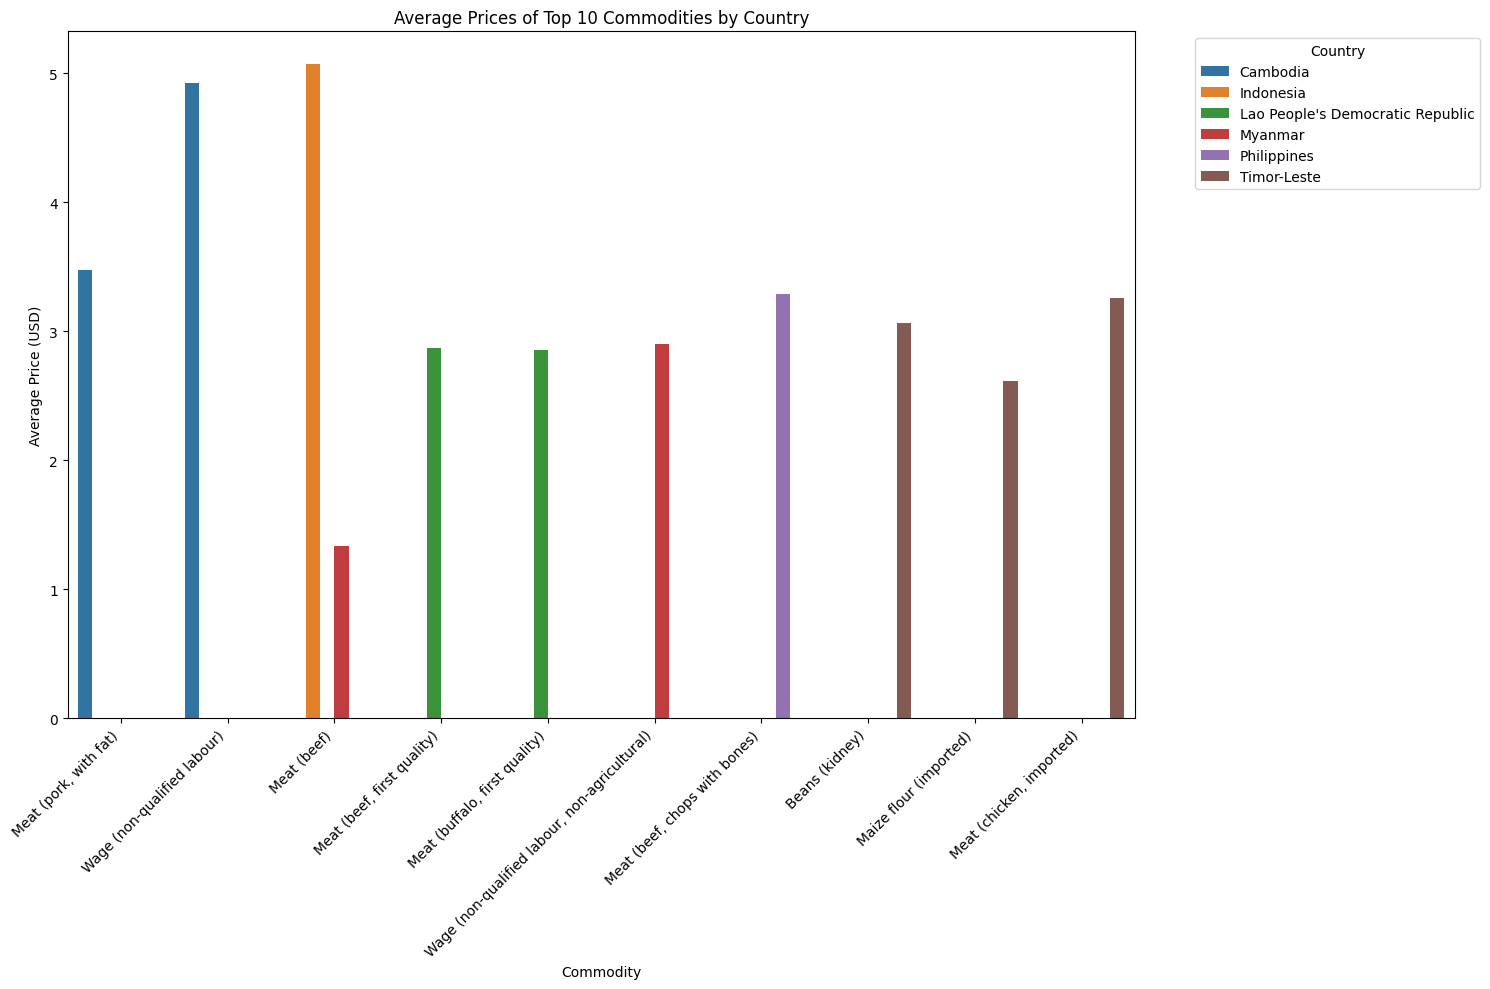

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Group the data by country and commodity, calculating the average price in USD
avg_prices_by_country = filtered_df.groupby(['country_name', 'commodity_name'])['price_usd'].mean().reset_index()

# Get the top N commodities by overall average price
top_n = 10  # You can adjust this number
top_commodities = avg_prices_by_country.groupby('commodity_name')['price_usd'].mean().nlargest(top_n).index

# Filter the data to include only these top commodities
plot_data = avg_prices_by_country[avg_prices_by_country['commodity_name'].isin(top_commodities)]

# Create the bar plot
plt.figure(figsize=(15, 10))
sns.barplot(x='commodity_name', y='price_usd', hue='country_name', data=plot_data)

plt.title(f'Average Prices of Top {top_n} Commodities by Country')
plt.xlabel('Commodity')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Let's take a look at Philipines
filtered_df[filtered_df['country_name'] == 'Philippines']

# Filter for Philippines data
philippines_df = filtered_df[filtered_df['country_name'] == 'Philippines']

# Group by commodity and calculate the average price in USD
avg_prices_by_commodity = philippines_df.groupby('commodity_name')['price_usd'].mean()
print(avg_prices_by_commodity)

commodity_name
Beans (mung)                     1.358013
Cabbage                          0.791136
Carrots                          1.048772
Eggs                             0.091278
Fish (fresh)                     1.912698
Garlic                           3.254506
Groundnuts (unshelled)           1.766917
Meat (beef, chops with bones)    3.287646
Meat (chicken, whole)            2.393323
Meat (pork)                      3.233280
Onions (red)                     1.351274
Onions (white)                   1.223408
Potatoes (Irish)                 1.089525
Rice (paddy)                     0.262274
Rice (regular, milled)           0.579539
Sweet potatoes                   0.476777
Tomatoes                         0.675427
Name: price_usd, dtype: float64


In [ ]:
# import requests

# # Replace with your actual API key
# API_KEY = "29c42f90a0612c3da5444bf2cbe4fa53"

# # Set up the API endpoint and parameters
# url = "https://api.exchangeratesapi.io/v1/latest?access_key=29c42f90a0612c3da5444bf2cbe4fa53&base=USD&symbols=GBP"
# # params = {
# #     "access_key": API_KEY,
# #     "base": "USD",  # Base currency
# #     "symbols": "KHR, IDR, LAK, MMK, PHP"  # Currencies you want to convert to
# # }

# # Make the API request
# response = requests.get(url, params=params)

# if response.status_code == 200:
#     data = response.json()
#     print(data)
# else:
#     print(f"Error: {response.status_code}")

<ipython-input-30-b1b681e856c9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  philippines_df['price_usd'] = philippines_df['price_usd'].round(2)


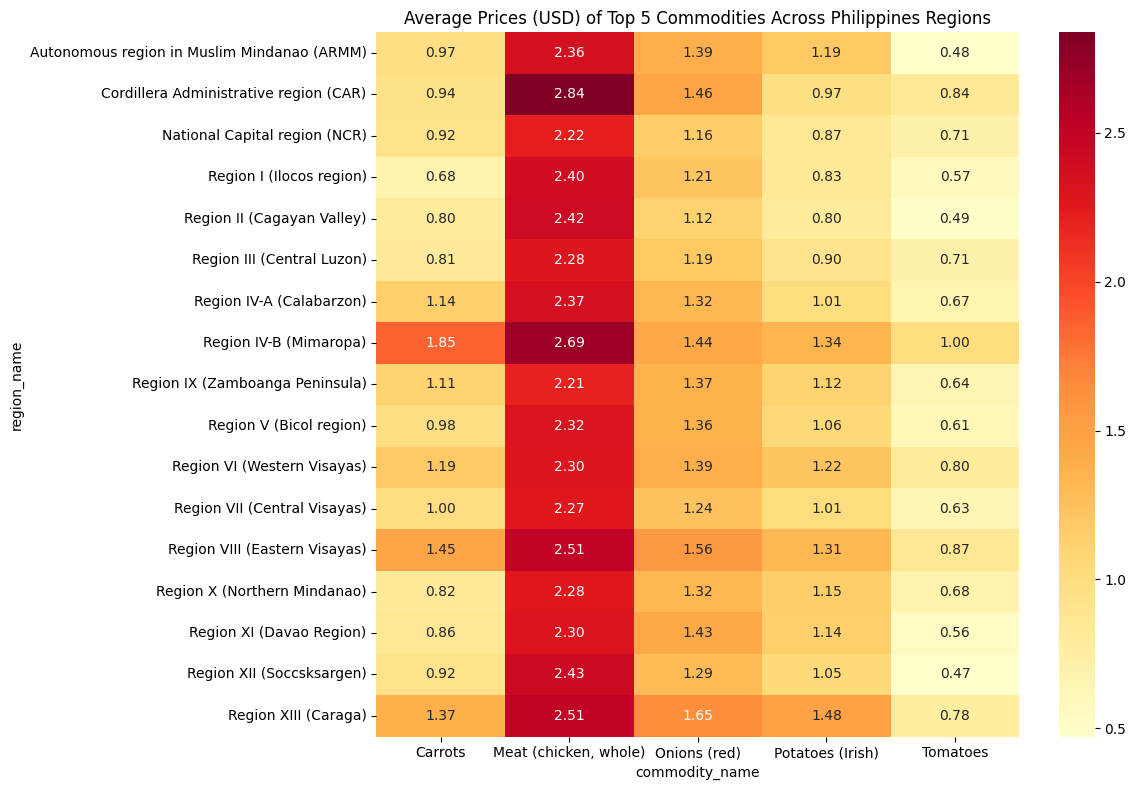

Summary statistics for top 5 commodities across regions:
commodity_name    Carrots  Meat (chicken, whole)  Onions (red)  \
count           17.000000              17.000000     17.000000   
mean             1.047816               2.394257      1.347359   
std              0.290088               0.166659      0.141144   
min              0.680119               2.205412      1.116786   
25%              0.856627               2.283810      1.235783   
50%              0.973929               2.364235      1.364524   
75%              1.139024               2.429167      1.432500   
max              1.852805               2.837945      1.653976   

commodity_name  Potatoes (Irish)   Tomatoes  
count                  17.000000  17.000000  
mean                    1.086268   0.676370  
std                     0.187693   0.146147  
min                     0.803333   0.472262  
25%                     0.966190   0.571647  
50%                     1.057143   0.665529  
75%                     1.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure price_usd is rounded to two decimal places
philippines_df['price_usd'] = philippines_df['price_usd'].round(2)

# Group by region, commodity, and calculate average price
region_commodity_prices = philippines_df.groupby(['region_name', 'commodity_name'])['price_usd'].mean().reset_index()

# Get the top 5 most common commodities
top_commodities = philippines_df['commodity_name'].value_counts().nlargest(5).index

# Filter for these top commodities
top_commodity_prices = region_commodity_prices[region_commodity_prices['commodity_name'].isin(top_commodities)]

# Create a pivot table for easier plotting
pivot_prices = top_commodity_prices.pivot(index='region_name', columns='commodity_name', values='price_usd')

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_prices, annot=True, fmt='.2f', cmap='YlOrRd')
plt.title('Average Prices (USD) of Top 5 Commodities Across Philippines Regions')
plt.tight_layout()
plt.show()

# Print summary statistics
print("Summary statistics for top 5 commodities across regions:")
print(pivot_prices.describe())

# Find the commodity with the highest price variation across regions
price_variation = pivot_prices.std()
most_variable_commodity = price_variation.idxmax()
print(f"\nCommodity with highest price variation across regions: {most_variable_commodity}")
print(f"Price range: ${pivot_prices[most_variable_commodity].min():.2f} - ${pivot_prices[most_variable_commodity].max():.2f}")

# Calculate percentage difference between highest and lowest price for each commodity
for commodity in top_commodities:
    min_price = pivot_prices[commodity].min()
    max_price = pivot_prices[commodity].max()
    pct_difference = ((max_price - min_price) / min_price) * 100
    print(f"\n{commodity}:")
    print(f"Lowest price: ${min_price:.2f} (Region: {pivot_prices[commodity].idxmin()})")
    print(f"Highest price: ${max_price:.2f} (Region: {pivot_prices[commodity].idxmax()})")
    print(f"Percentage difference: {pct_difference:.2f}%")

In [ ]:
philippines_df['region_name'].value_counts()

region_name
Region XI (Davao Region)                       1201
Region IV-A (Calabarzon)                       1167
Region II (Cagayan Valley)                     1142
Region I (Ilocos region)                       1141
Region V (Bicol region)                        1131
Region VI (Western Visayas)                    1120
Region IX (Zamboanga Peninsula)                1108
Cordillera Administrative region (CAR)         1105
Region X (Northern Mindanao)                   1090
Region VII (Central Visayas)                   1068
Region IV-B (Mimaropa)                         1053
Region XII (Soccsksargen)                      1046
Autonomous region in Muslim Mindanao (ARMM)    1021
Region III (Central Luzon)                     1007
Region VIII (Eastern Visayas)                  1002
Region XIII (Caraga)                            996
National Capital region (NCR)                   717
Name: count, dtype: int64

In [ ]:
philippines_df.head()

country_id country_name  region_id                    region_name  \
447931         196  Philippines       2355  National Capital region (NCR)   
447932         196  Philippines       2355  National Capital region (NCR)   
447933         196  Philippines       2355  National Capital region (NCR)   
447934         196  Philippines       2355  National Capital region (NCR)   
447935         196  Philippines       2355  National Capital region (NCR)   

        market_id market_name  commodity_id          commodity_name  \
447931        167      Manila            80  Rice (regular, milled)   
447932        167      Manila            80  Rice (regular, milled)   
447933        167      Manila            80  Rice (regular, milled)   
447934        167      Manila            80  Rice (regular, milled)   
447935        167      Manila            80  Rice (regular, milled)   

        currency_id currency_name  price_type_id price_type_name  unit_id  \
447931           29           PHP             15          Retail        5   
447932           29           PHP             15          Retail        5   
447933           29           PHP             15          Retail        5   
447934           29           PHP             15          Retail        5   
447935           29           PHP             15          Retail        5   

       unit_name  month  year  price commodity_source  exchange_rate  \
447931        KG      1  2011   30.0           DA-BAS          0.018   
447932        KG      2  2011   30.0           DA-BAS          0.018   
447933        KG      3  2011   30.0           DA-BAS          0.018   
447934        KG      4  2011   30.0           DA-BAS          0.018   
447935        KG      5  2011   30.0           DA-BAS          0.018   

        price_usd  
447931       0.54  
447932       0.54  
447933       0.54  
447934       0.54  
447935       0.54

<ipython-input-39-05ebe9b74a2f>:32: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


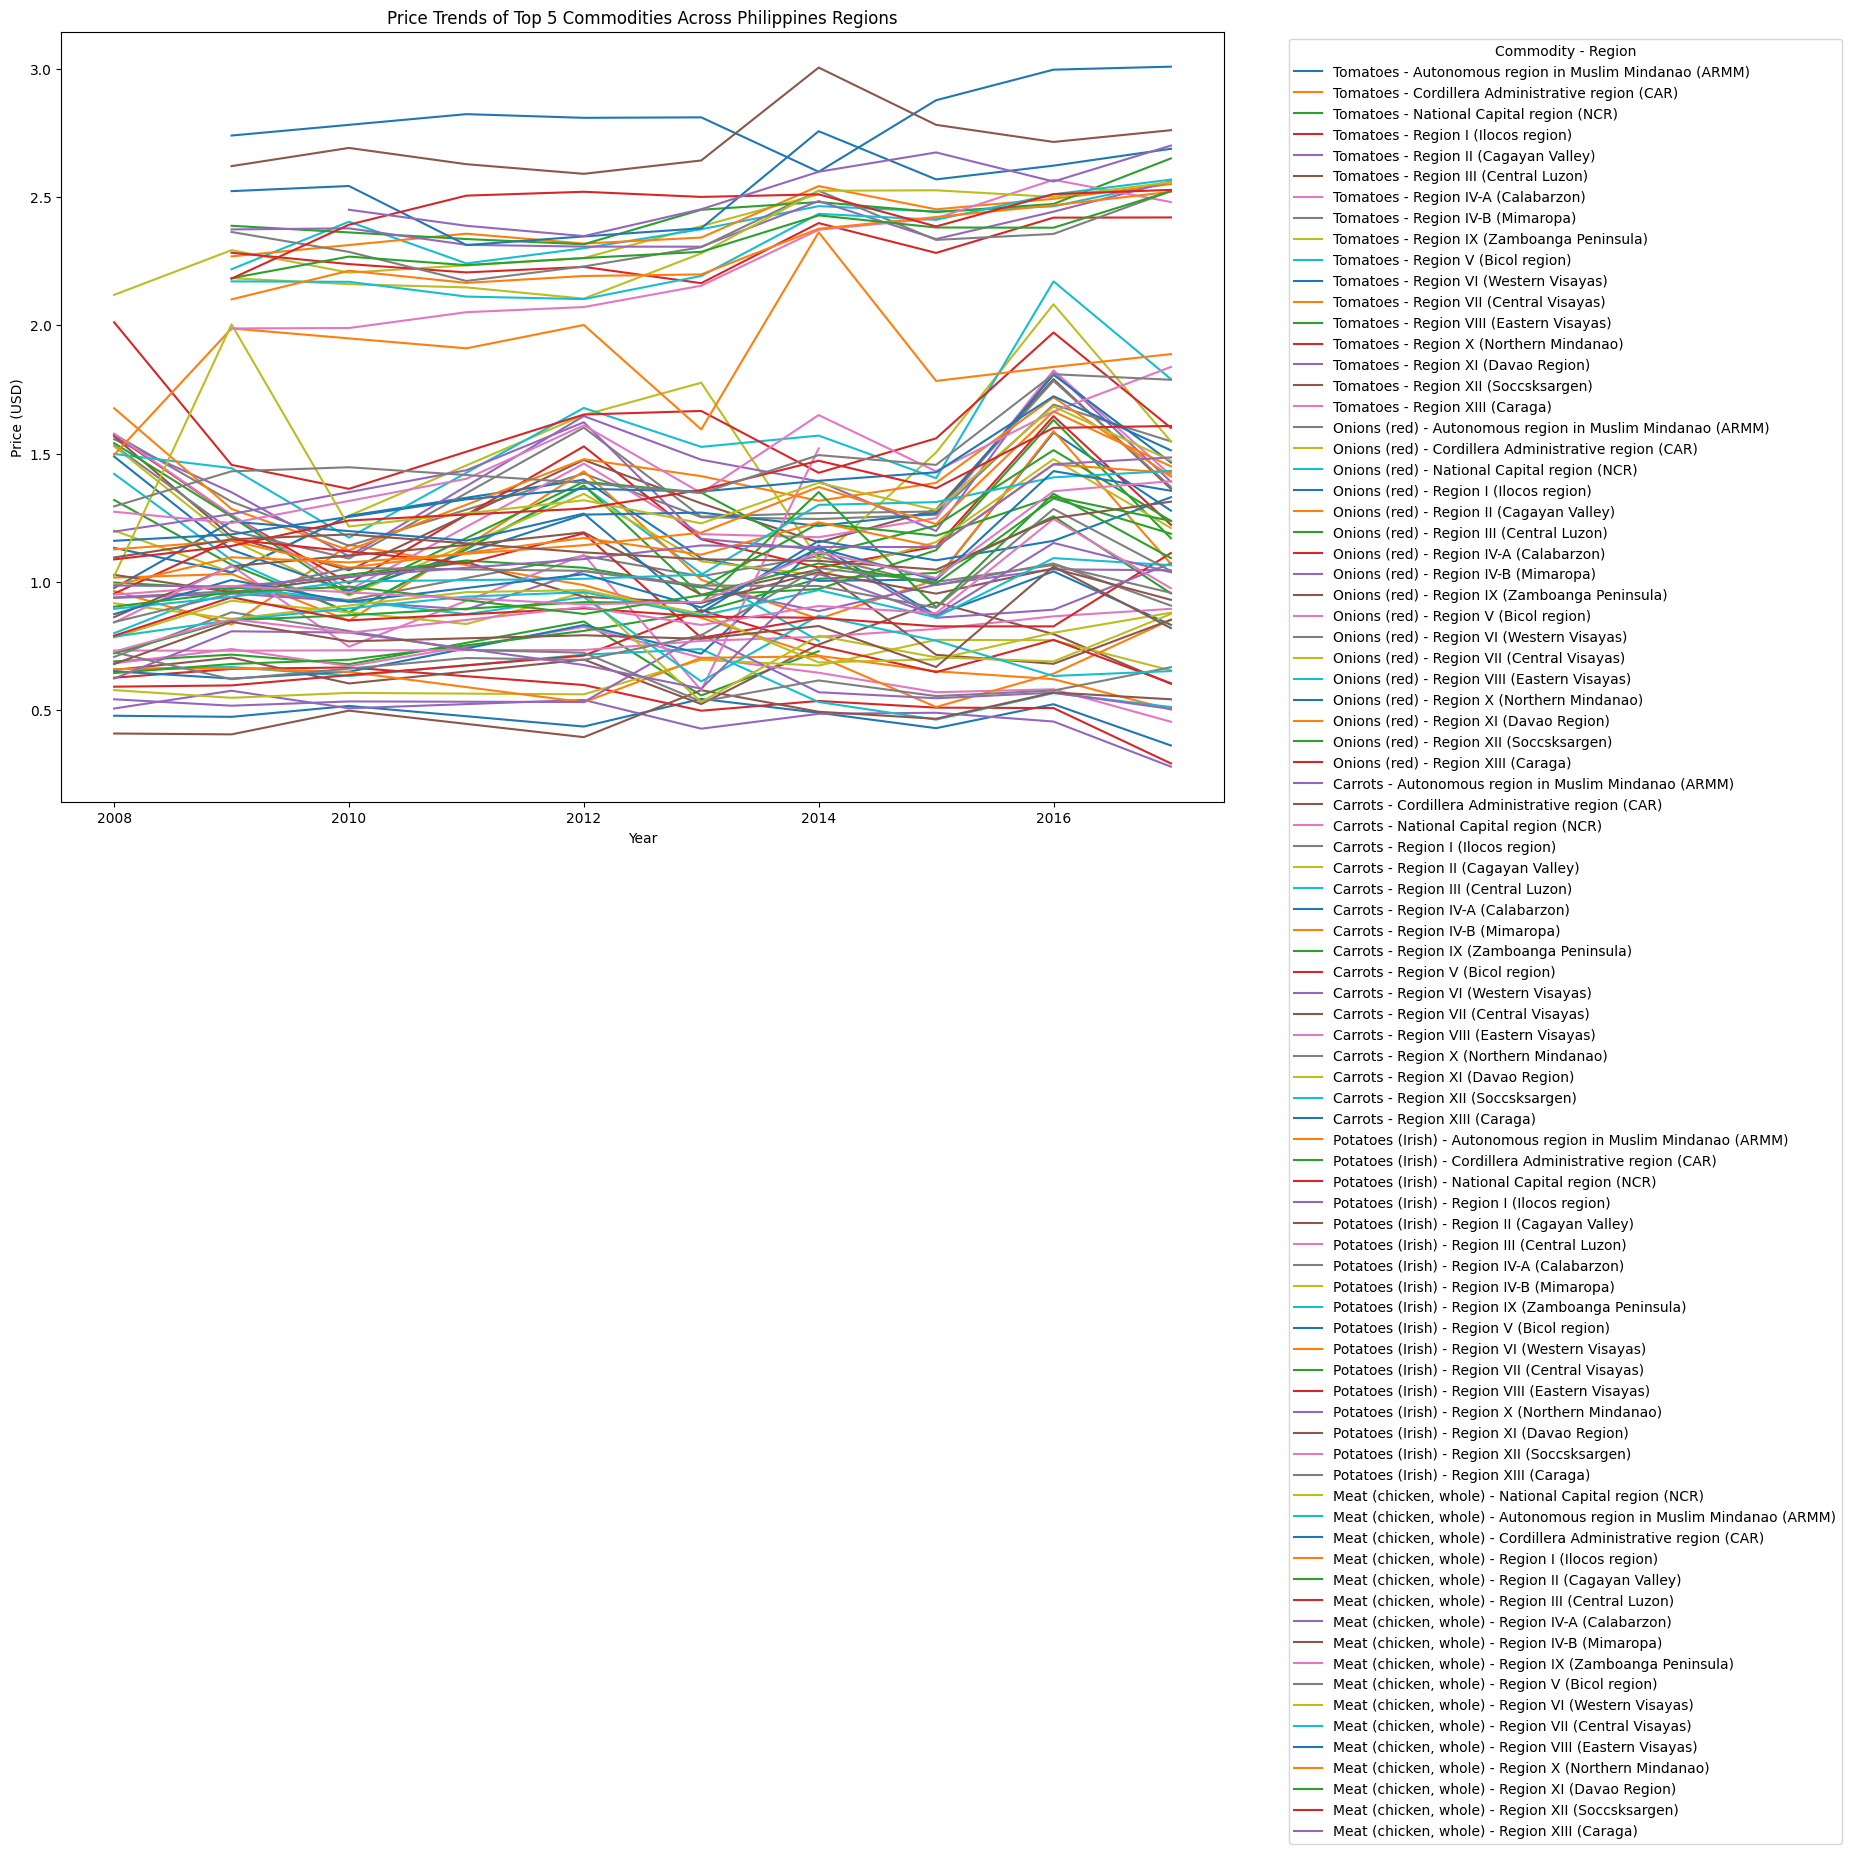

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your filtered DataFrame is called 'philippines_df'
# Ensure it has columns: 'year', 'region_name', 'commodity_name', 'price_usd'

# Get the top 5 most common commodities
top_commodities = philippines_df['commodity_name'].value_counts().nlargest(5).index

# Filter for these top commodities
df_top = philippines_df[philippines_df['commodity_name'].isin(top_commodities)]

# Create a line plot for each commodity
plt.figure(figsize=(15, 10))

for commodity in top_commodities:
    commodity_data = df_top[df_top['commodity_name'] == commodity]

    # Group by year and region, then calculate mean price
    grouped_data = commodity_data.groupby(['year', 'region_name'])['price_usd'].mean().reset_index()

    # Plot for each region
    for region in grouped_data['region_name'].unique():
        region_data = grouped_data[grouped_data['region_name'] == region]
        plt.plot(region_data['year'], region_data['price_usd'], label=f"{commodity} - {region}")

plt.title('Price Trends of Top 5 Commodities Across Philippines Regions')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.legend(title='Commodity - Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




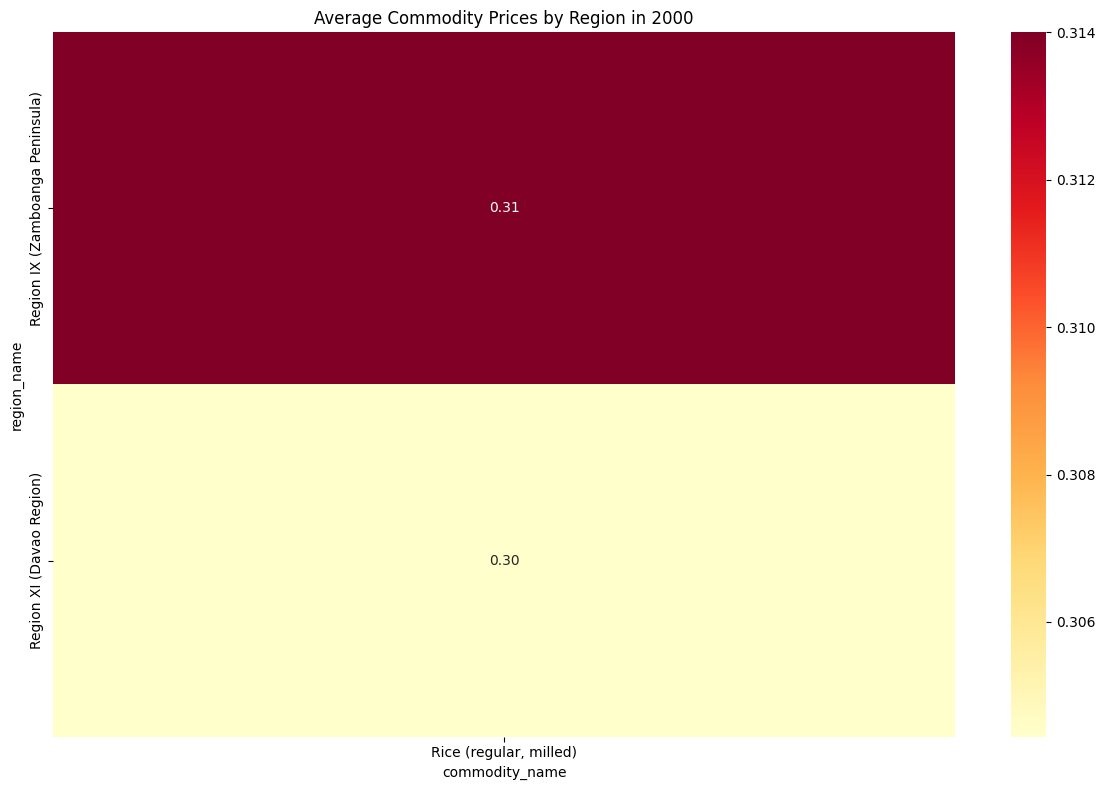

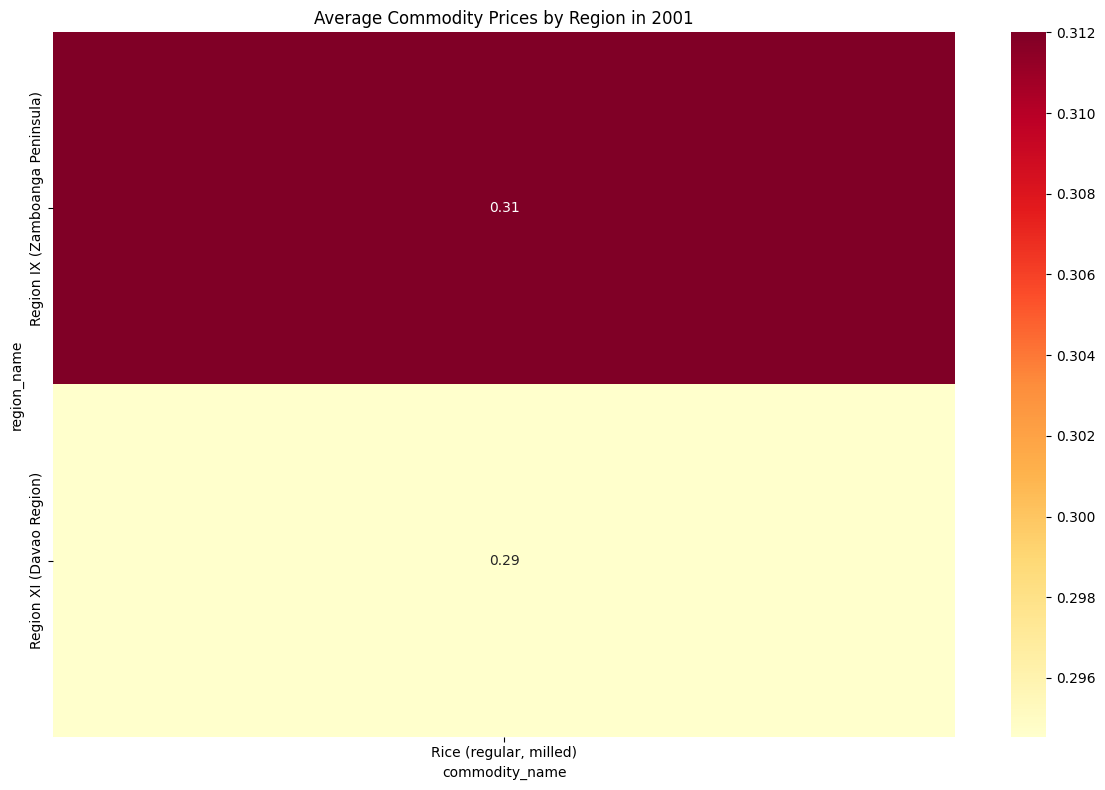

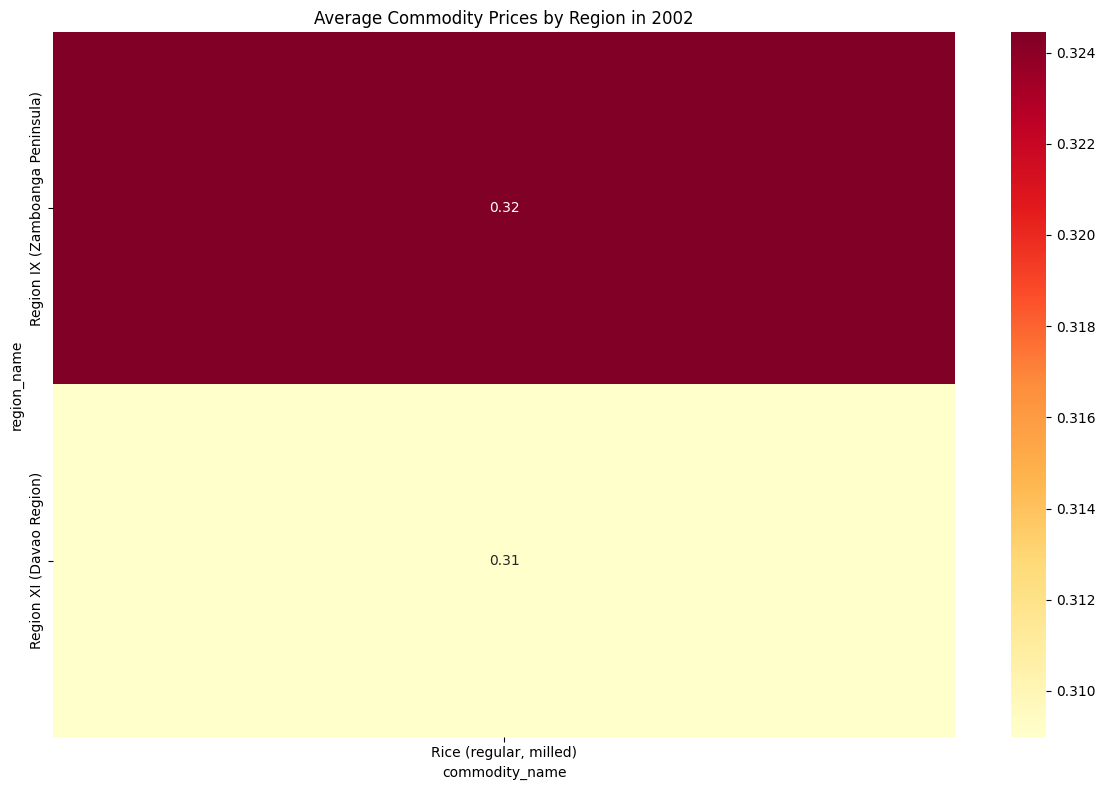

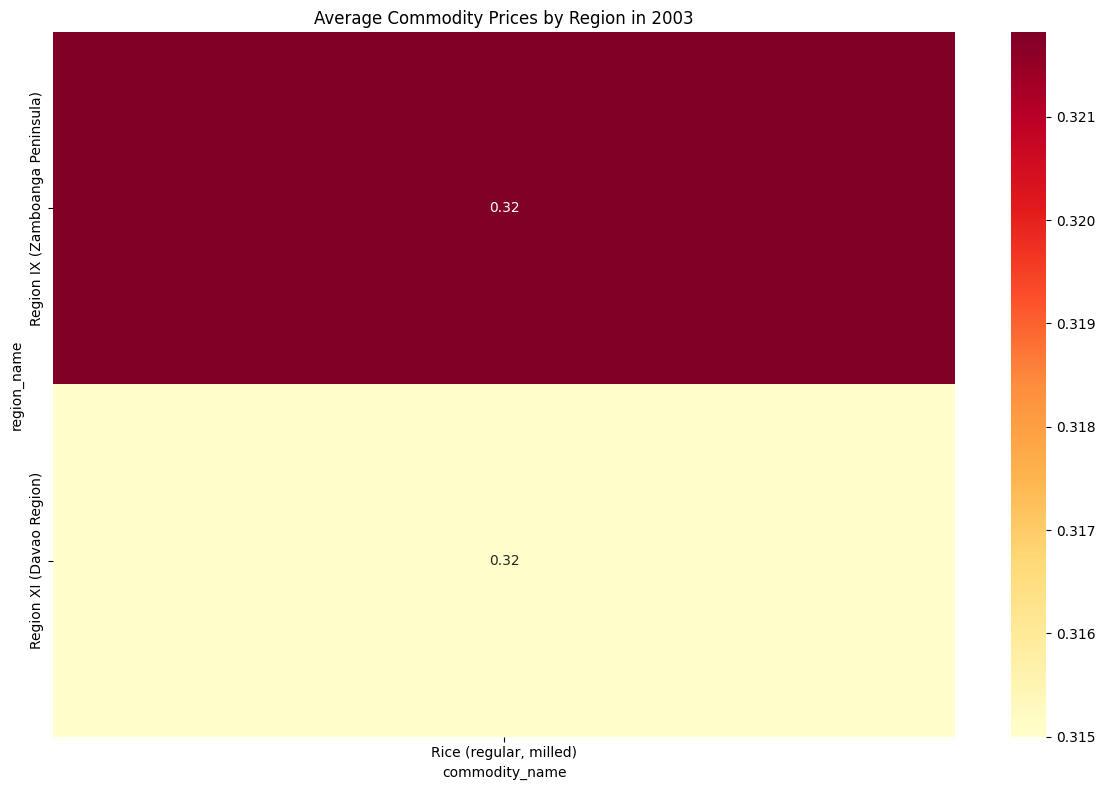

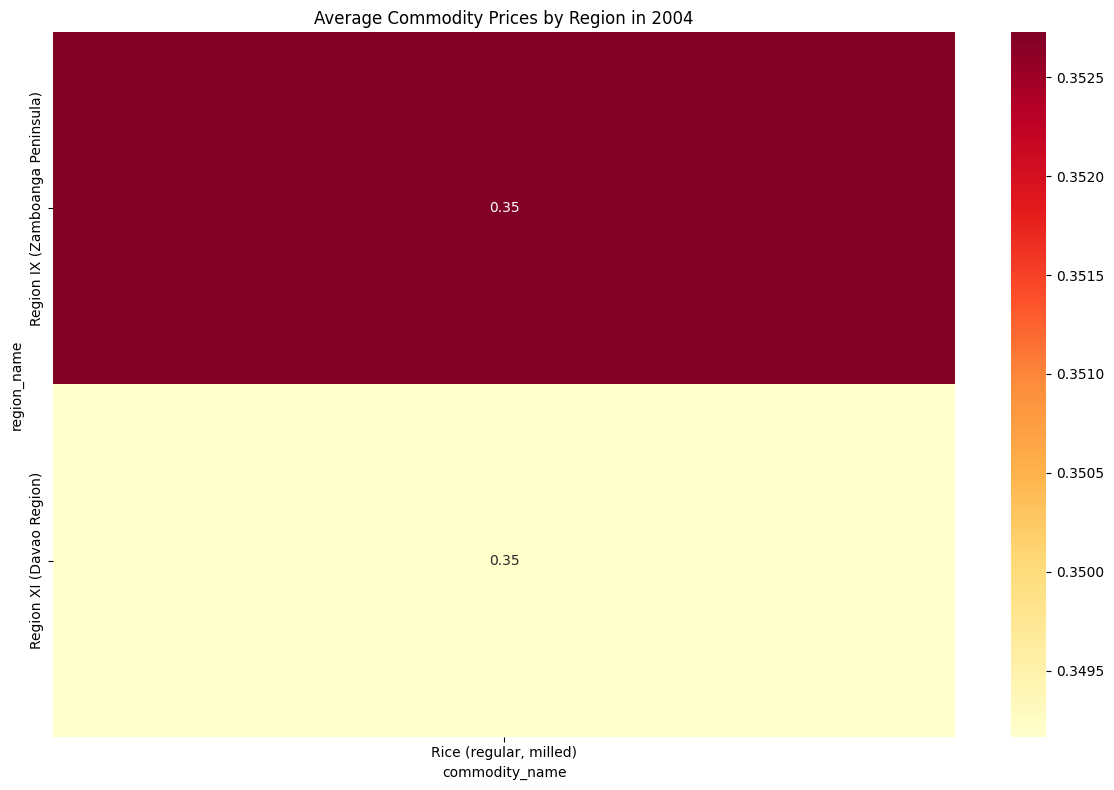

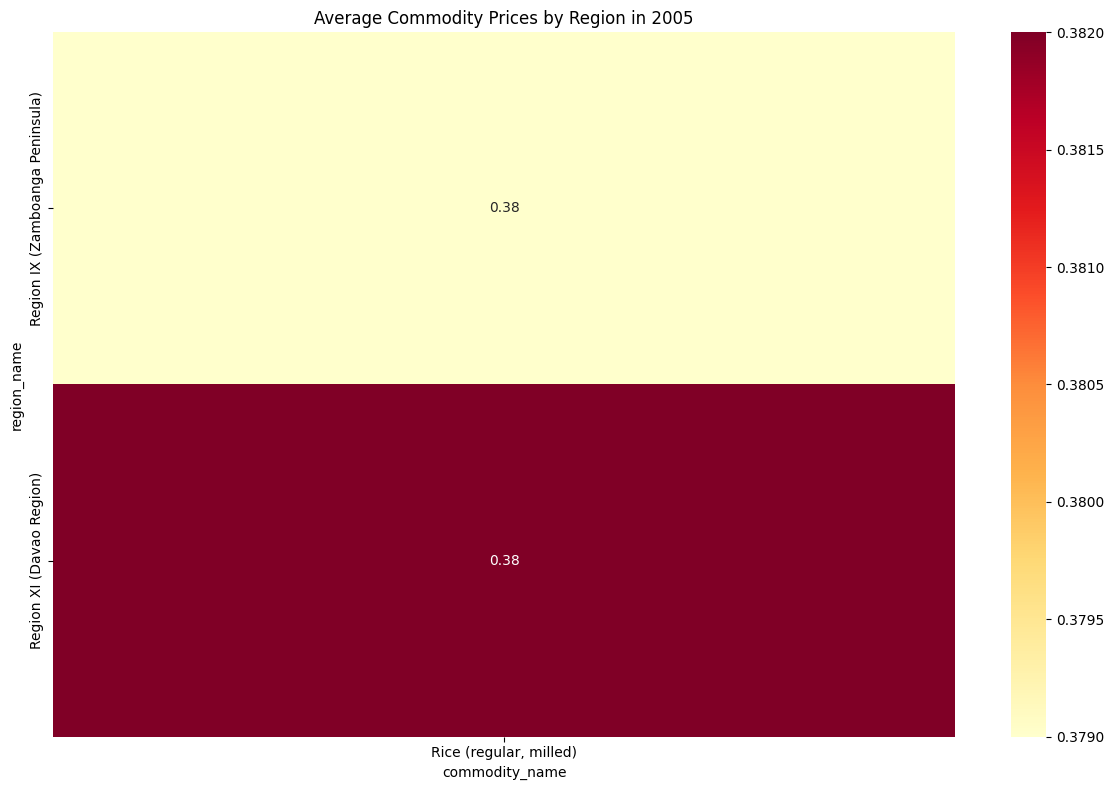

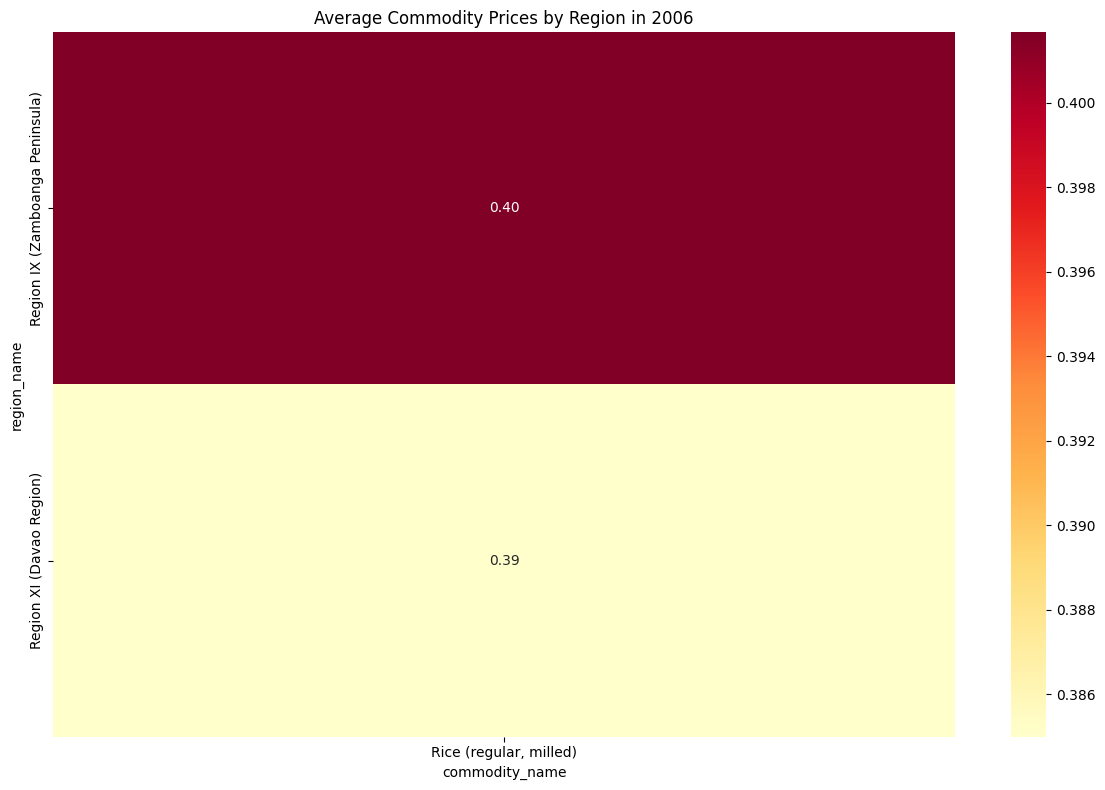

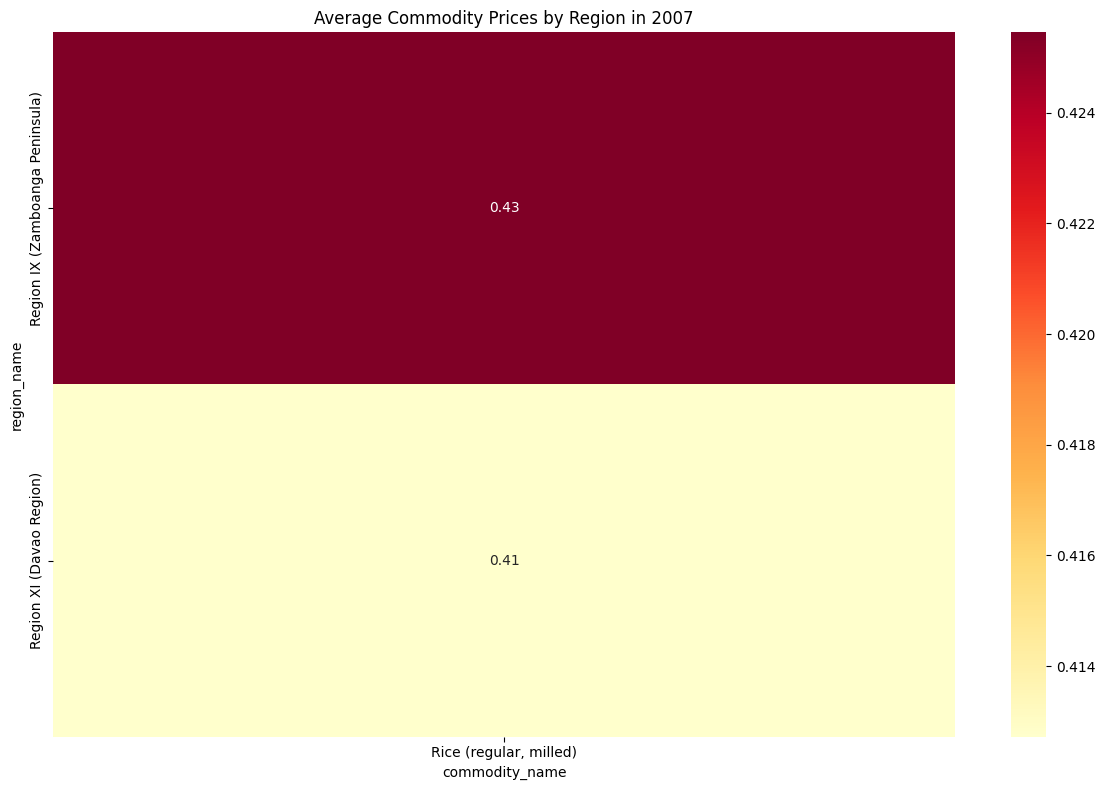

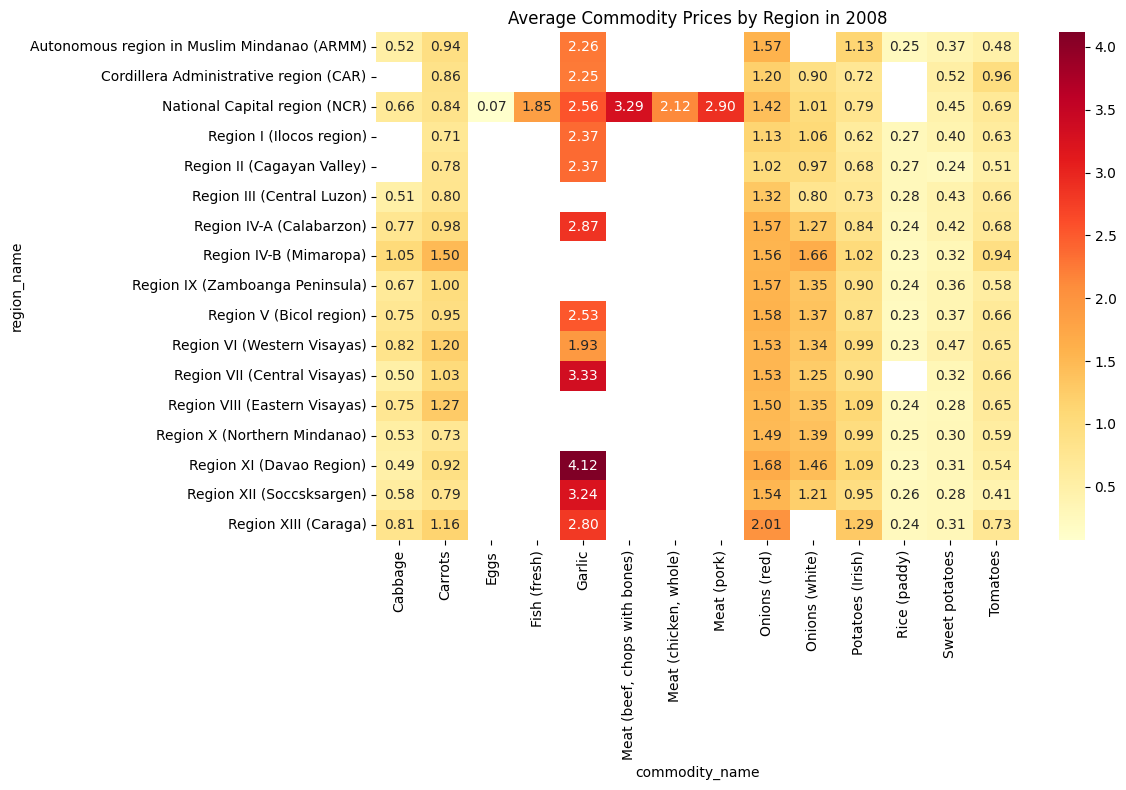

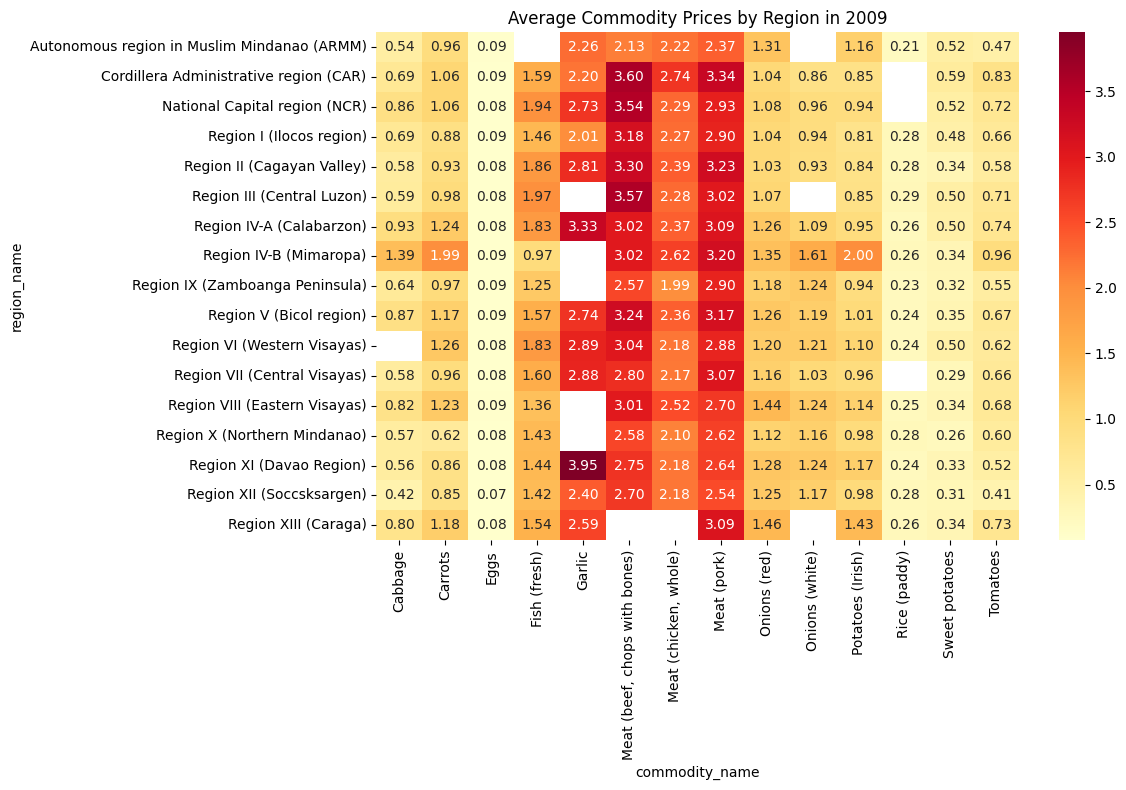

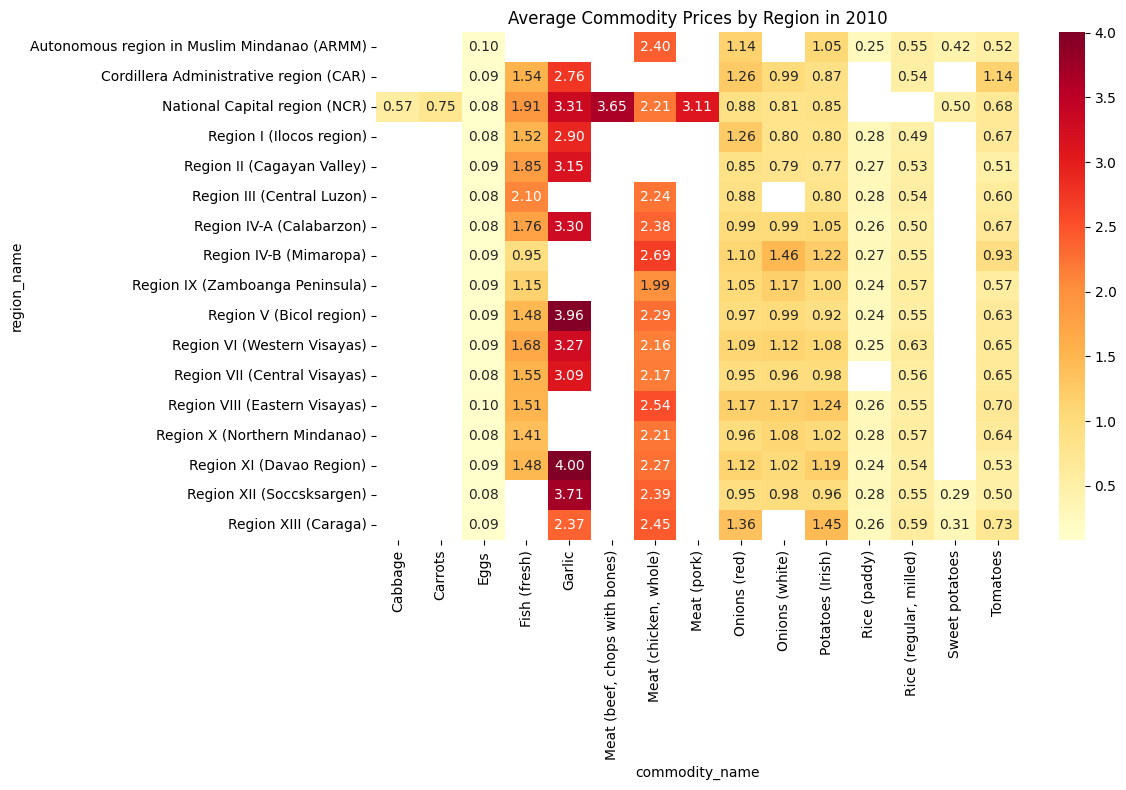

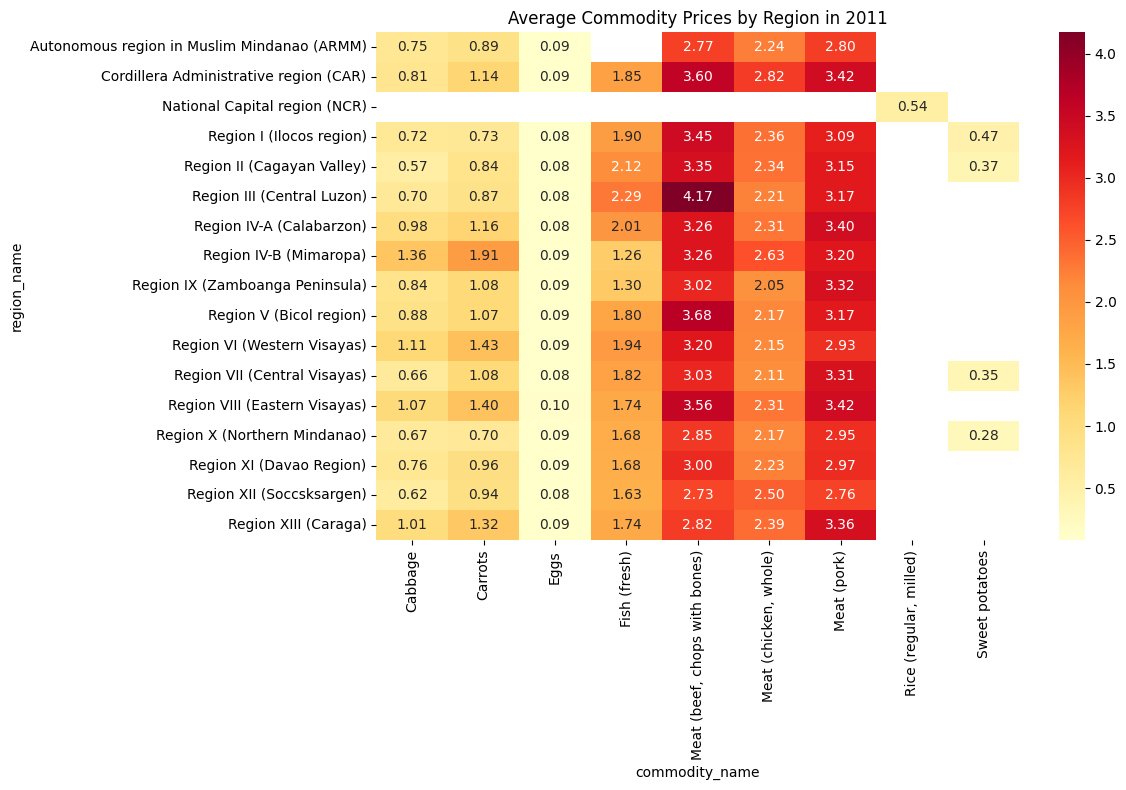

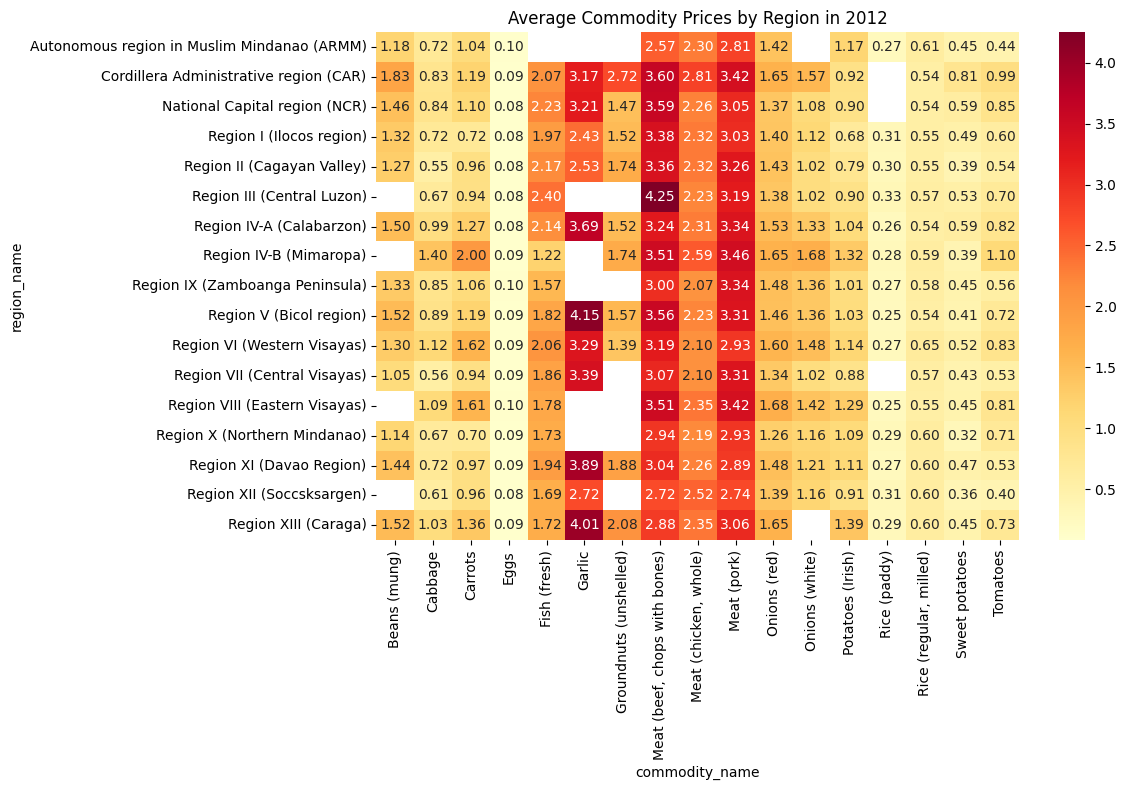

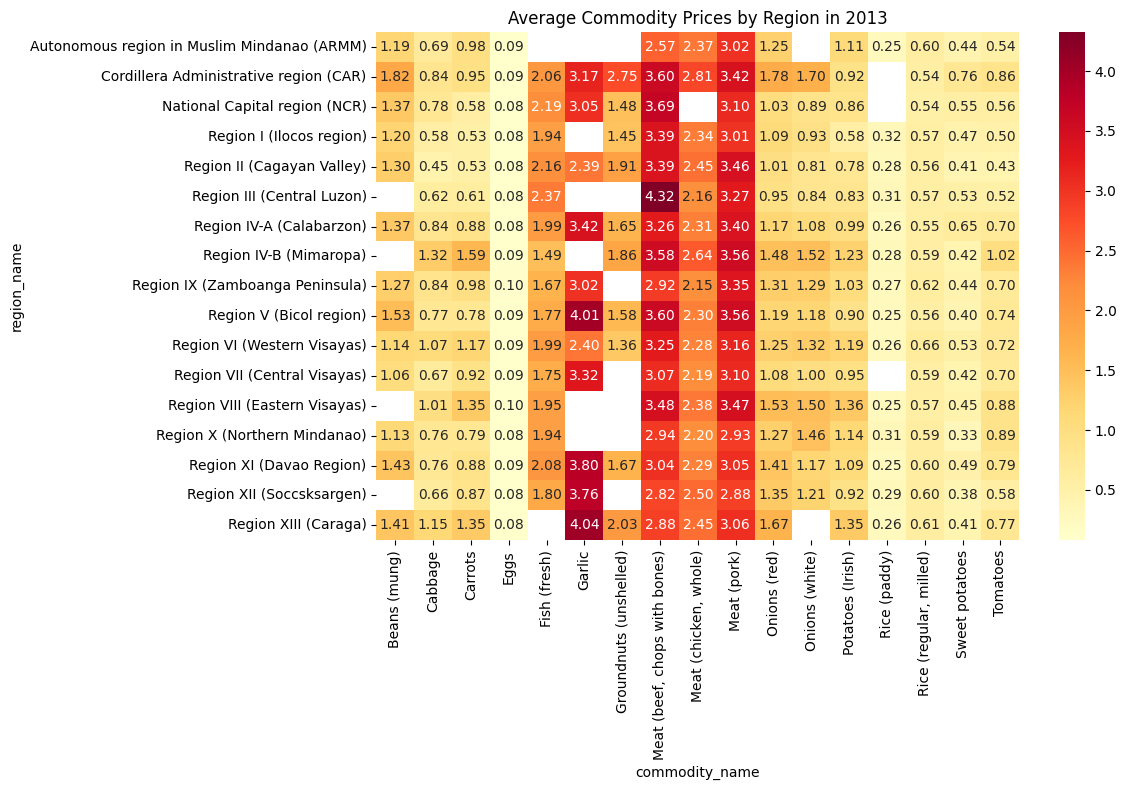

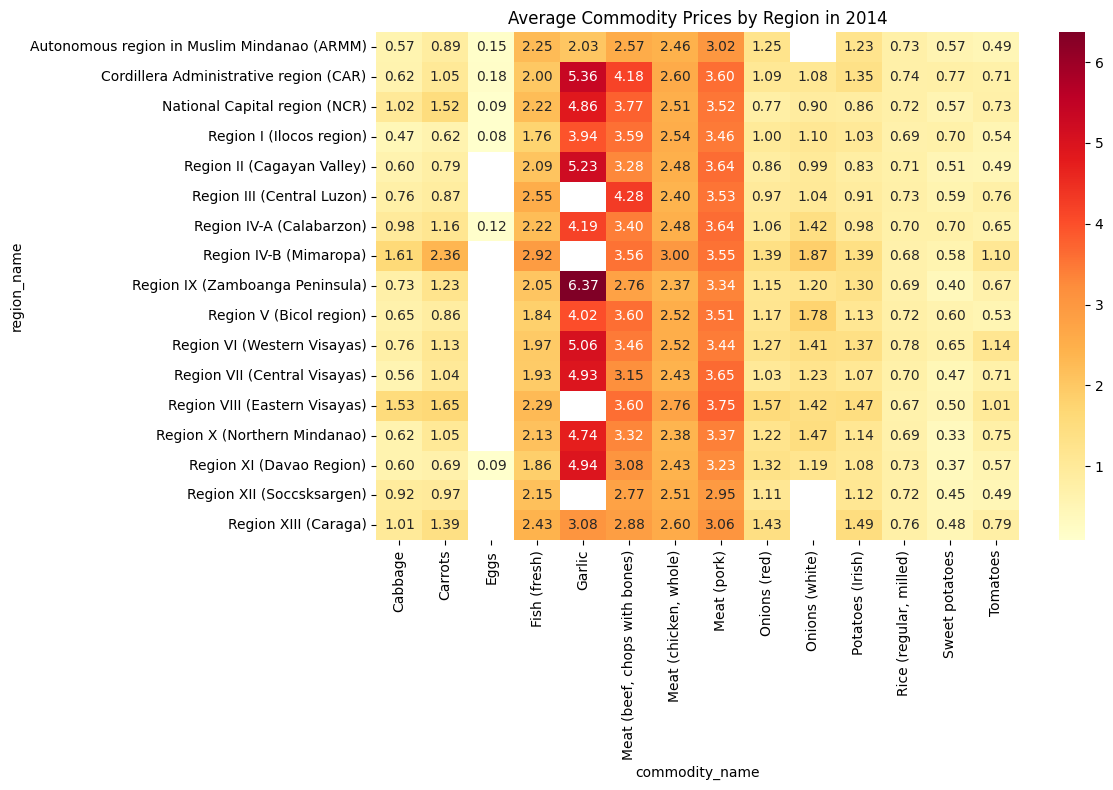

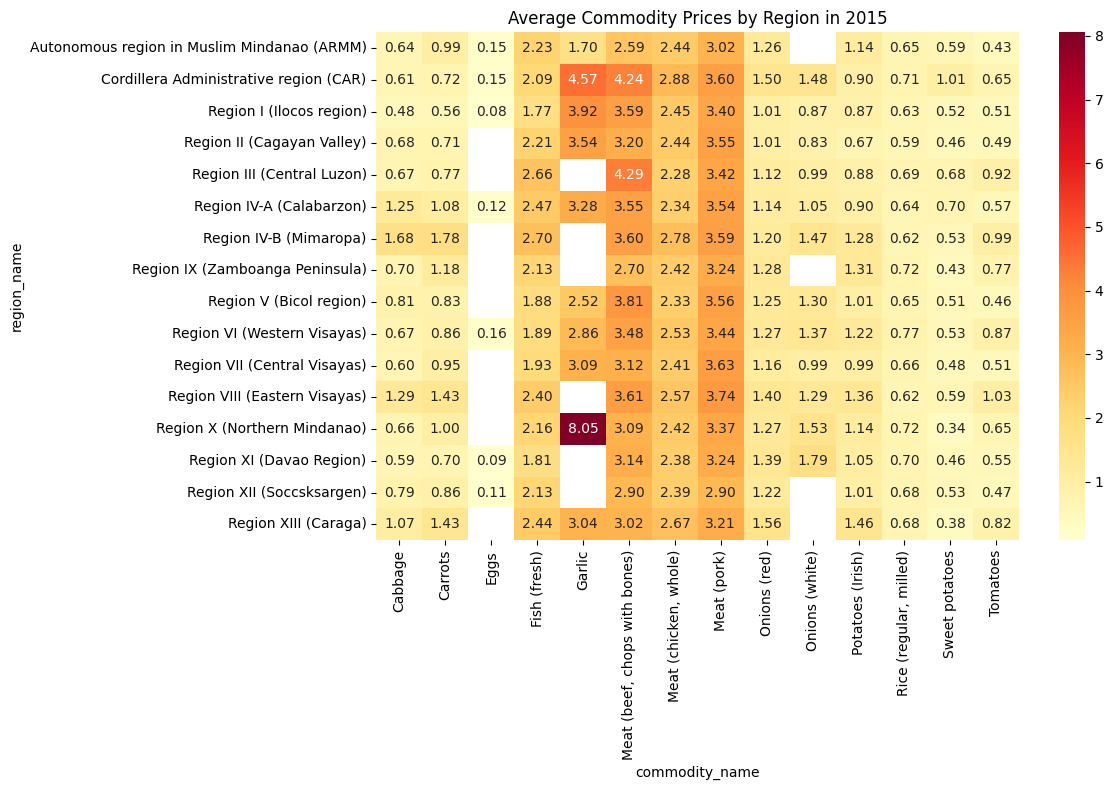

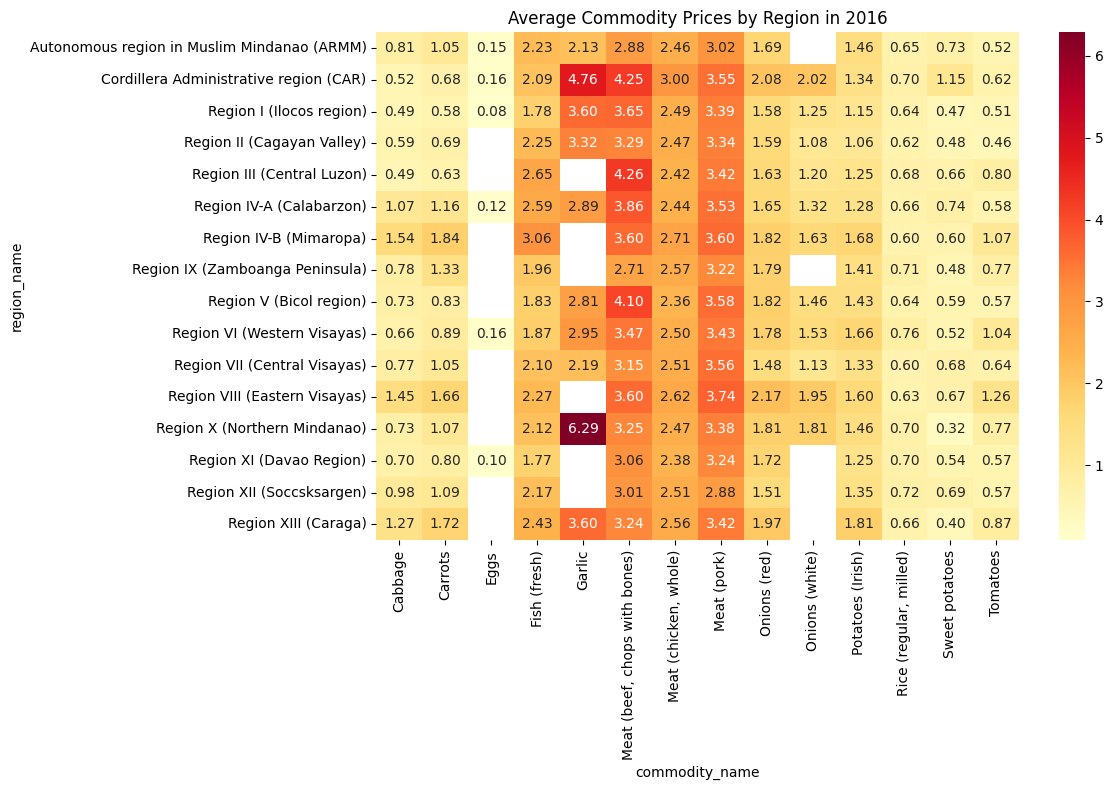

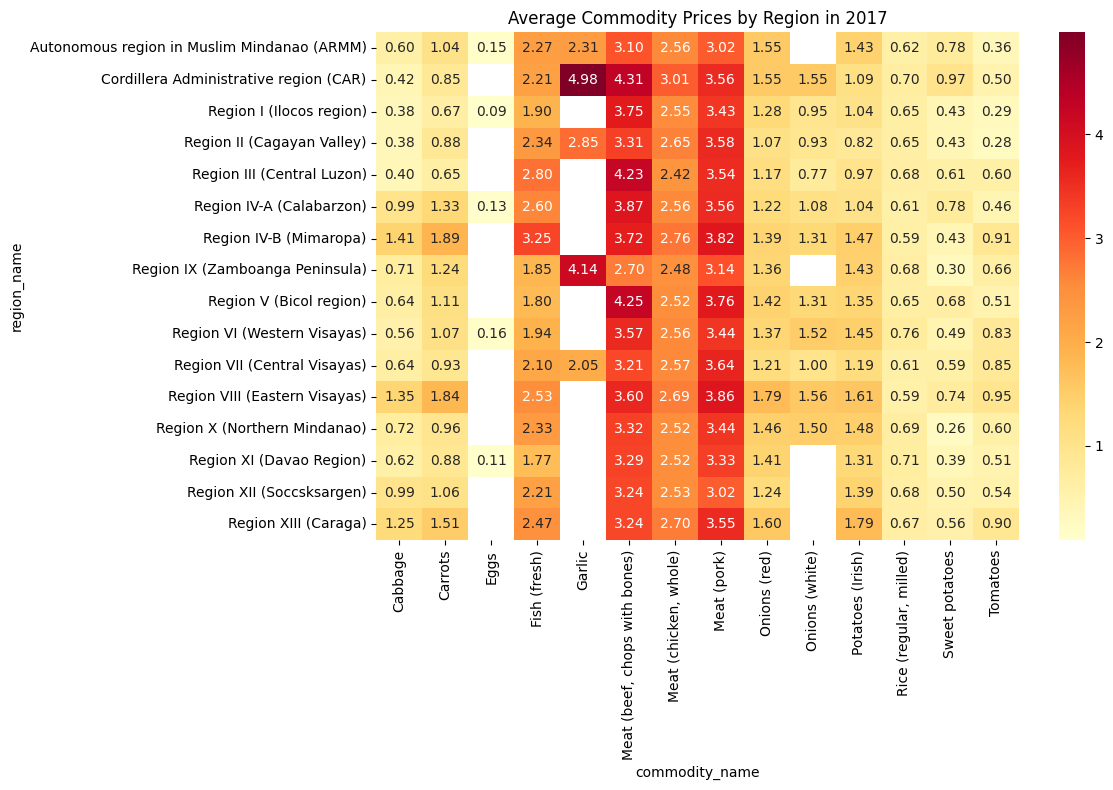

In [ ]:
# Calculate average yearly prices for each region and commodity
yearly_prices = philippines_df.groupby(['year', 'region_name', 'commodity_name'])['price_usd'].mean().reset_index()

# Create a heatmap for each year
years = yearly_prices['year'].unique()
for year in years:
    year_data = yearly_prices[yearly_prices['year'] == year]
    pivot_data = year_data.pivot(index='region_name', columns='commodity_name', values='price_usd')

    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_data, annot=True, fmt='.2f', cmap='YlOrRd')
    plt.title(f'Average Commodity Prices by Region in {year}')
    plt.tight_layout()
    plt.show()

In [ ]:

# Print summary statistics for each year
for year in years:
    year_data = yearly_prices[yearly_prices['year'] == year]
    print(f"\nSummary statistics for {year}:")
    print(year_data.groupby('commodity_name')['price_usd'].describe())

# Calculate and print the percentage change in prices from the first to the last year
first_year = years.min()
last_year = years.max()

first_year_prices = yearly_prices[yearly_prices['year'] == first_year].set_index(['region_name', 'commodity_name'])['price_usd']
last_year_prices = yearly_prices[yearly_prices['year'] == last_year].set_index(['region_name', 'commodity_name'])['price_usd']

price_change = ((last_year_prices - first_year_prices) / first_year_prices * 100).reset_index()
price_change = price_change.rename(columns={0: 'percent_change'})

print(f"\nPercentage change in prices from {first_year} to {last_year}:")
print(price_change)


Summary statistics for 2000:
                        count      mean       std       min       25%  \
commodity_name                                                          
Rice (regular, milled)    2.0  0.309222  0.006757  0.304444  0.306833   

                             50%       75%    max  
commodity_name                                     
Rice (regular, milled)  0.309222  0.311611  0.314  

Summary statistics for 2001:
                        count      mean       std       min       25%  \
commodity_name                                                          
Rice (regular, milled)    2.0  0.303273  0.012342  0.294545  0.298909   

                             50%       75%    max  
commodity_name                                     
Rice (regular, milled)  0.303273  0.307636  0.312  

Summary statistics for 2002:
                        count      mean       std    min       25%       50%  \
commodity_name                                                                

# Analysis of Food Price Trends in the Philippines (2007-2017)

## Key Findings

1. **Overall Trend**: General increase in food prices across all commodities from 2007 to 2017.

2. **Commodity-specific Trends**:
   - **Rice**: Relatively stable prices, showing least fluctuation
   - **Pork and Chicken**: Highest prices and most significant increases
   - **Eggs and Cooking Oil**: Moderate price increases

3. **Regional Variations**: Considerable price differences across regions persist over time

4. **Temporal Observations**:
   - **2007**: Generally lower prices across most regions
   - **2012**: Moderate price increases, regional variations become more apparent
   - **2017**: Higher prices with pronounced regional differences

## Commodity-specific Insights

- **Rice**: Maintains relatively stable prices, crucial for food security
- **Pork and Chicken**: Show most dramatic price increases, potentially affecting protein accessibility
- **Eggs and Cooking Oil**: Moderate but consistent price increases

## Regional Considerations

- Some regions consistently show higher prices across multiple commodities
- Regional price disparities highlight the need for targeted economic policies

## Implications

1. **Food Security**: Rising prices may impact access to nutritious food, especially in lower-income regions
2. **Economic Policy**: Need for region-specific approaches to address price disparities
3. **Consumer Behavior**: Potential shifts in consumption patterns due to price changes
4. **Agricultural Focus**: Importance of maintaining stable rice prices while addressing volatility in other commodities

## Further Analysis Needed

- Correlation with regional income levels and cost of living
- Impact of specific events (e.g., natural disasters, policy changes) on price spikes
- Supply chain analysis to understand regional price differences